In [2]:
# nltk.download()
import numpy as np 
import pandas as pd
import nltk
import re # Regular Expression

from sklearn.metrics import accuracy_score # to calculate accuracy

In [3]:
data = pd.read_csv("gender-classifier-DFE-791531.csv", encoding="latin1")

data = pd.concat([data.gender, data.description], axis=1) # we only select gender and decription(tweet) columns
data.dropna(axis = 0, inplace = True) # to dropped the null rows

In [4]:
data.head(7)

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,female,you don't know me.
6,brand,"A global marketplace for images, videos and mu..."


In [5]:
get_female = data["gender"] == "female" # to select specific gender
get_male = data["gender"] == "male"
get_brand = data["gender"] == "brand"

female_rows = data[get_female]
male_rows = data[get_male]
brand_rows = data[get_brand]

print("Total female tweets : ", female_rows.count().gender) # to see counts of genders
print("Total brand tweets  : ", brand_rows.count().gender)
print("Total male tweets   : ", male_rows.count().gender)

Total female tweets :  5725
Total brand tweets  :  4328
Total male tweets   :  5469


In [6]:
female_rows.gender = 0
male_rows.gender = 1
brand_rows.gender = 2

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
# frames = [female_rows, male_rows, brand_rows] list'den frame e gecis
data = pd.concat([female_rows, male_rows, brand_rows], ignore_index=False) #to concatanate the gender rows

In [8]:
data

,gender,description
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,0,you don't know me.
8,0,Pll Fan // Crazy about MCD // Ramen is bae
9,0,"Renaissance art historian, University of Notti..."
12,0,Senior '16 . XI-XII-MMXIV.
...,...,...
20030,2,Crowdsourcing #Innovation! The FINND connects ...
20034,2,Where Raleigh's dynamic leaders come to connec...
20038,2,The FUN site for Animal Lovers - Get the lates...
20041,2,"When families go through divorce, it's helpful..."


In [9]:
from nltk.corpus import stopwords

description_list = []
for description in data.description:
    description = re.sub("[^a-zA-Z]", " ", description)
    # sub method finds the given pattern ([^a-zA-Z] means, NOT letter like ":") and changes them with " " (space)
    description = description.lower()
    # we need to have all letters lowercase (because A is not equall to a)
    description = nltk.word_tokenize(description)
    
    description = [word for word in description if not word in set(stopwords.words("english"))] # we make a word list from our text
    
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description] # to find the roots of each words with lemma
    
    description = " ".join(description) # to combine the words back together 
    description_list.append(description) # to add our texts to list

In [10]:
print("Original version: ", data.description.iloc[3982]) # here, we check if our stopwords function works
print("New version:      ", description_list[3982])  # as we see, new version is cleared of stopwords.

Original version:  Beauty begins the moment you decide to be yourself - Coco Chanel ëÒë_ëÕ
New version:       beauty begin moment decide coco chanel


In [11]:
# We will implement "bag of words" method
from sklearn.feature_extraction.text import CountVectorizer
max_features = 1000 # we can choose how many features we want to add 
cv = CountVectorizer(max_features=max_features, stop_words = "english")# in this method, we remove the stopwords (irrelevant words) in English language. (like "of", "and", "the" etc.)
matrix = cv.fit_transform(description_list).toarray() # to create a matrix with new version texts

print("Top used {} words: {}".format(max_features, cv.get_feature_names())) # we can check here the top used words

Top used 1000 words: ['account', 'action', 'activist', 'actor', 'actress', 'add', 'addict', 'addicted', 'adult', 'adventure', 'advertising', 'advice', 'advisor', 'advocate', 'affair', 'affiliate', 'aficionado', 'african', 'age', 'agency', 'air', 'aka', 'alive', 'alternative', 'alum', 'alumnus', 'amateur', 'amazing', 'amazon', 'ambassador', 'america', 'american', 'analysis', 'analyst', 'android', 'angel', 'animal', 'anime', 'answer', 'anti', 'app', 'apple', 'area', 'arsenal', 'art', 'artist', 'ask', 'aspiring', 'assistant', 'associate', 'association', 'atheist', 'athlete', 'athletics', 'author', 'available', 'average', 'avid', 'award', 'away', 'awesome', 'baby', 'bad', 'bae', 'ball', 'band', 'bar', 'baseball', 'based', 'basketball', 'beach', 'bear', 'beat', 'beautiful', 'beauty', 'beer', 'believe', 'believer', 'best', 'better', 'bieber', 'big', 'biggest', 'bio', 'bit', 'bitch', 'black', 'blacklivesmatter', 'blessed', 'blind', 'blog', 'blogger', 'blue', 'board', 'body', 'book', 'booking'

In [12]:
y = data.iloc[:, 0].values # we only select the gender column
x = matrix

In [13]:
# train the test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) #we split test size 0.2

In [14]:
def getAccuracy(y_test, y_pred): # instead of code reputation this function provides to find accuracy score
    return 100.0 * accuracy_score(y_test, y_pred)

In [35]:
# Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier

# training
RandomForest = RandomForestClassifier()
RandomForest.fit(x_train, y_train)

# prediction
y_pred = RandomForest.predict(x_test)

print('%s: %.2f' % ('Random Forest Model accuracy(%)', getAccuracy(y_test, y_pred))) # calling getAccuracy function

Random Forest Model accuracy(%): 58.71


In [37]:
# Gaussian Naive Bayes Implementation
from sklearn.naive_bayes import GaussianNB

# training
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(x_train, y_train)

# prediction
y_pred = GaussianNaiveBayes.predict(x_test)

print('%s: %.2f' % ('Gaussian Naive Bayes accuracy(%)', getAccuracy(y_test, y_pred)))

Gaussian Naive Bayes accuracy(%): 56.88


In [15]:
# Decision Tree Classifier Implementation
from sklearn.tree import DecisionTreeClassifier

# training
DecisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DecisionTree.fit(x_train, y_train)

# prediction
y_pred = DecisionTree.predict(x_test)

print('%s: %.2f' % ('Decision Tree accuracy(%)', getAccuracy(y_test, y_pred)))

Decision Tree accuracy(%): 53.17


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold # Provides train/test indices to split data in train/test sets.

GaussianNaiveBayes = GaussianNB()
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_results = cross_val_score(GaussianNaiveBayes, x_train, y_train, cv=kfold, scoring='accuracy')

In [40]:
print('%s: %.2f' % ('Gaussian Naive Bayes accuracy(%)', cv_results.mean() * 100))

Gaussian Naive Bayes accuracy(%): 55.85


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)


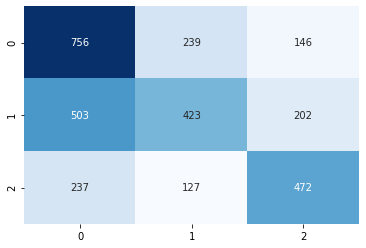

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm,cbar=False,annot=True,cmap="Blues",fmt="d")
plt.show()